In [153]:
import csv
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.datasets import fetch_mldata
import sklearn.datasets
import matplotlib.pyplot as plt

In [154]:
def RangeQuery(euc, i, eps):    
    neigh = []
    q = np.where(euc[i] <= eps)
    if(q[0].shape[0] > 0):
        return np.array(q[0])
    return np.array(neigh)

In [155]:
def DBSCAN(matrix, eps, minpts,euc):
    
    Noise = []
    c = 0;
    label = {}
    visited = np.full((matrix.shape[0],), False)
    for i in range(matrix.shape[0]):
        if (not visited[i]):
            visited[i] = True
            neighbours = RangeQuery(euc,i,eps)
            if(neighbours.shape[0] < minpts):
                label[i] = "Noise"
                continue
            c += 1
            label[i] = c;
            q = np.where(neighbours == i)
            count = 0
            while(count < len(neighbours)):
                point = neighbours[count]
                if(not visited[point]):
                    visited[point] = True
                    neighbourstemp = RangeQuery(euc,point,eps)
                    if(neighbourstemp.shape[0] >= minpts):
                        neighbours = np.concatenate((neighbours,
                                                     np.array(np.delete(neighbourstemp, np.searchsorted(neighbourstemp, np.intersect1d(neighbours,neighbourstemp))))))
                    label[point] = c
                count +=1
    
    clusterwise = {}
    Noise = []
    for lab in label.keys():
        if(label[lab] != 'Noise'):
            if label[lab] in clusterwise:
                clusterwise[label[lab]].append(lab)
            else:
                list1 = [lab]
                clusterwise[label[lab]] = list1[:]
        else:
            Noise.append(label[lab])
    answer = []
    answer.append(clusterwise)
    answer.append(Noise)
    return answer
            

In [156]:
def FindEpi(dataset,euc):
    np.fill_diagonal(euc, 10000)
    distances = np.min(euc,axis = 1)
    print(len(distances))
    plt.hist(distances,10)
    plt.show()

In [66]:
def Findmin(dataset,epi,euc):
    data = []
    max1 = -1
    min1 = 10000000
    for i in range(dataset.shape[0]):
        neigh = RangeQuery(euc,i, epi)
        n1 = len(neigh)
        if n1 < min1:
            min1 = n1
        if n1 > max1:
            max1 = n1
        data.append(n1)
    print(max1)
    print(min1)
    print(len(data))
    plt.hist(data,10)
    plt.show()

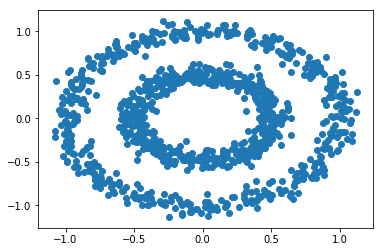

In [209]:
circles = sklearn.datasets.make_circles(n_samples=1000,noise=0.06,factor=0.5)
circlesdata = circles[0]
plt.scatter(circlesdata[:,0],circlesdata[:,1])
plt.show()

1000


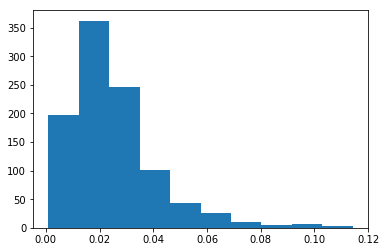

In [210]:
eucc = euclidean_distances(circlesdata)
FindEpi(circlesdata,eucc)

45
2
1000


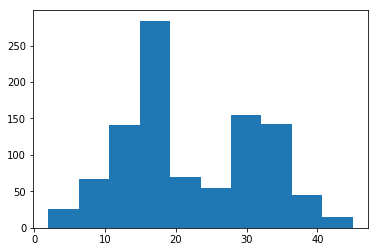

In [211]:
Findmin(circlesdata,0.13,eucc)

2
dict_keys([1, 2])


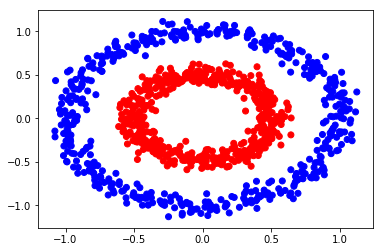

In [213]:
answer = DBSCAN(circlesdata, 0.14, 12,eucc)
labels = answer[0]
noise = answer[1]
print(len(labels))
print(labels.keys())
a = circlesdata[labels[1]]
clrArr = np.full(len(circlesdata),"Black")
for l in labels[1]:
    clrArr[l] = 'Red'
for l in labels[2]:
    clrArr[l] = 'Blue'

plt.scatter(circlesdata[:,0],circlesdata[:,1], c=clrArr) 
plt.show()

(1000, 2)


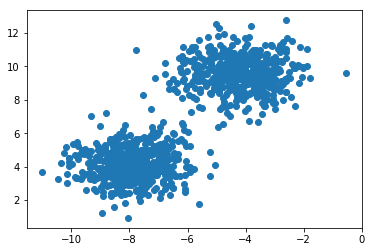

In [225]:
blobs = sklearn.datasets.make_blobs(n_samples=1000,centers=2)
blobsdata = blobs[0]
print(blobsdata.shape)
plt.scatter(blobsdata[:,0],blobsdata[:,1])
plt.show()

1000


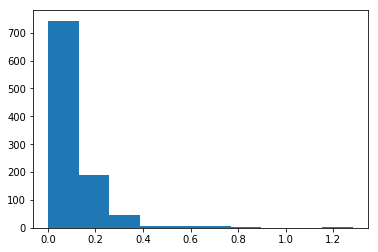

In [226]:
eucb = euclidean_distances(blobsdata)
FindEpi(blobsdata,eucb)

299
1
1000


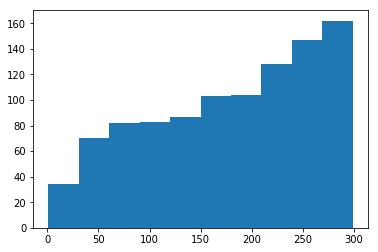

In [233]:
Findmin(blobsdata,1.34,eucb)

2


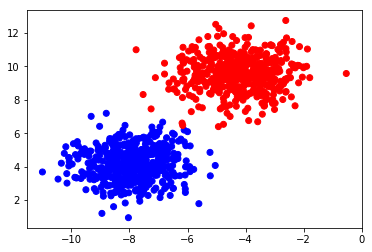

In [237]:
answer = DBSCAN(blobsdata,1.34,30,eucb)
labels = answer[0]
noise = answer[1]
print(len(labels))
a = blobsdata[labels[1]]
clrArr = np.full(len(blobsdata),"Black")
for l in labels[1]:
    clrArr[l] = 'Red'
for l in labels[2]:
    clrArr[l] = 'Blue'

plt.scatter(blobsdata[:,0],blobsdata[:,1], c=clrArr) 
plt.show()


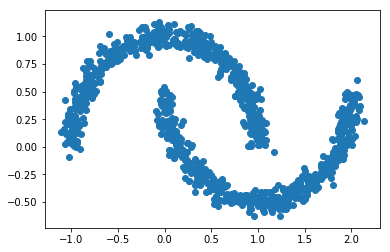

In [238]:

moons = sklearn.datasets.make_moons(n_samples=1000,noise=0.06)
moonsdata = moons[0]
plt.scatter(moonsdata[:,0],moonsdata[:,1])
plt.show()

1000


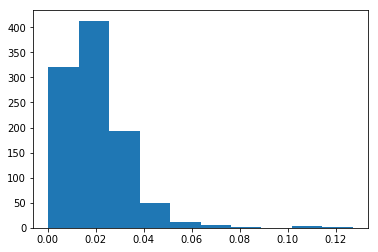

In [239]:
eucm = euclidean_distances(moonsdata)
FindEpi(moonsdata,eucm)

46
1
1000


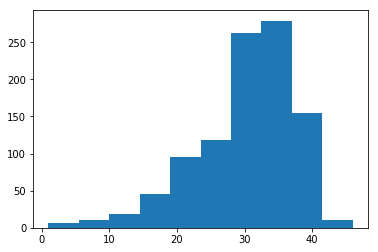

In [240]:
Findmin(moonsdata,0.13,eucm)

2


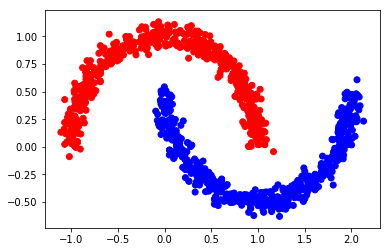

In [241]:
answer = DBSCAN(moonsdata, 0.13,9,eucm)
labels = answer[0]
noise = answer[1]
print(len(labels))
a = moonsdata[labels[1]]
clrArr = np.full(len(moonsdata),"Black")
for l in labels[1]:
    clrArr[l] = 'Red'
for l in labels[2]:
    clrArr[l] = 'Blue'

plt.scatter(moonsdata[:,0],moonsdata[:,1], c=clrArr) 
plt.show()

In [199]:
from utils import mnist_reader
import collections
train_data, train_labels = mnist_reader.load_mnist('data/', kind='t10K')
fashmnistnew = train_data/255;
fashmnistnewnp = np.array(fashmnistnew)
print(fashmnistnewnp.shape)

(10000, 784)


In [200]:
euc = euclidean_distances(fashmnistnewnp)

In [201]:
print(euc)

[[ 0.         15.89304603 13.56321211 ... 10.15074386 11.97647765
   5.86567308]
 [15.89304603  0.         15.53787945 ... 16.08526397 16.02145092
  15.81793278]
 [13.56321211 15.53787945  0.         ... 11.68707722  8.37602903
  12.31003567]
 ...
 [10.15074386 16.08526397 11.68707722 ...  0.         10.79745723
   9.41497984]
 [11.97647765 16.02145092  8.37602903 ... 10.79745723  0.
  10.59528669]
 [ 5.86567308 15.81793278 12.31003567 ...  9.41497984 10.59528669
   0.        ]]


10000


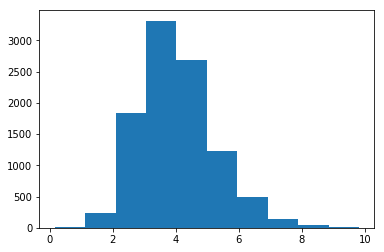

In [202]:
FindEpi(fashmnistnewnp,euc)

683
0
10000


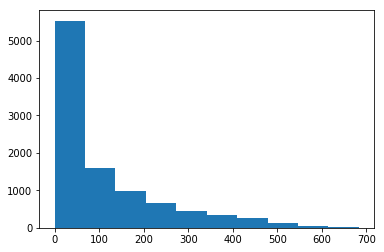

In [207]:
Findmin(fashmnistnewnp,5.4,euc)

In [206]:
answer = DBSCAN(fashmnistnewnp,5.4,3,euc)
labels = answer[0]
noise = answer[1]
print(len(labels))
print(len(noise))
for a in labels.keys():
    print("{}: {}".format(a,len(labels[a])))

10
1436
1: 8530
2: 6
3: 6
4: 3
5: 3
6: 5
7: 5
8: 2
9: 3
10: 1


In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=5.67, min_samples=3).fit(fashmnistnewnp)
labels = db.labels_

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

In [47]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
newsgroups_train = fetch_20newsgroups(subset="train",remove={'headers','quotes','footers'})

newsgroups_traindata = newsgroups_train.data

vectorizer = TfidfVectorizer(analyzer='word',stop_words="english",max_df=0.95, min_df = 0)
vectors = vectorizer.fit_transform(newsgroups_traindata)
print(vectors.shape)

(11314, 101322)


11314


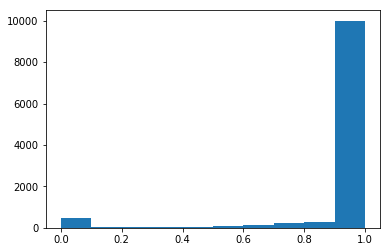

In [48]:
eucv = euclidean_distances(vectors)
FindEpi(vectors,eucv)

317
0
11314


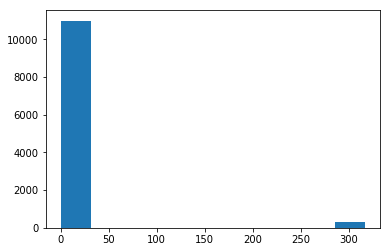

In [198]:
Findmin(vectors,0.95,eucv)

In [196]:
answer = DBSCAN(vectors,0.95,4,eucv)
labels = answer[0]
noise = answer[1]
print(len(labels))
print(len(noise))
for a in labels.keys():
    print("{}: {}".format(a,len(labels[a])))

20
10843
1: 12
2: 318
3: 6
4: 10
5: 35
6: 8
7: 5
8: 5
9: 5
10: 11
11: 8
12: 3
13: 8
14: 4
15: 12
16: 3
17: 6
18: 4
19: 4
20: 4


In [8]:
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%d/%m/%Y")
    d2 = datetime.strptime(d2, "%d/%m/%Y")
    return abs((d2 - d1).days)

In [9]:
def time_between(d1, d2):
    d1 = datetime.strptime(d1, "%H:%M:%S")
    d2 = datetime.strptime(d2, "%H:%M:%S")
    return abs((d2 - d1).seconds/60)

In [142]:
#text_file = open('/Users/panktibhalani/Downloads/household_power_consumption.txt', 'r')
text_file = open('/Users/panktibhalani/Downloads/household_small.txt', 'r')
lines = text_file.readlines();
matrix = []
date = []
points = []
num_neighbours = []
neighbors = []
count = 0
for line in lines:
    if "?" not in line: 
        locallist = []
        lineatt = line.split(";")
#         date = lineatt[0]
#         year = date.split("/")[2]
#         datenum = days_between("1/1/" + year,date)
#         time = lineatt[1]
#         timenum = time_between("00:00:00",time)
        locallist.append(datenum)
        locallist.append(timenum)
        locallist.append(lineatt[0])
        locallist.append(lineatt[1])
        locallist.append(lineatt[2])
        locallist.append(lineatt[3])
        locallist.append(lineatt[4])
        locallist.append(lineatt[5])
        locallist.append(lineatt[6])
        listtemp = list(map(float,locallist))
        matrix.append(listtemp)
matrix = np.array(matrix)
print(matrix.shape)

(10000, 7)


In [143]:
print(matrix.shape)

(10000, 7)


In [144]:
idx = np.random.randint(matrix.shape[0], size=10000)
hhdata = matrix[idx]
print(hhdata.shape)

(10000, 7)


10000


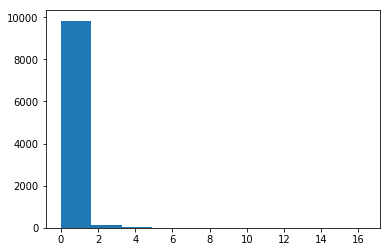

In [145]:
euchh = euclidean_distances(hhdata)
FindEpi(hhdata,euchh)

4984
0
10000


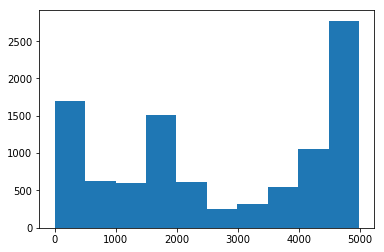

In [146]:
Findmin(hhdata,4.5,euchh)

In [151]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.8, min_samples=10).fit(hhdata)
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

10


In [174]:

answer = DBSCAN(hhdata,1.8,9,euchh)
labels = answer[0]
noise = answer[1]
print(len(labels))
print(len(noise))
for a in labels.keys():
    print("{}: {}".format(a,len(labels[a])))

10
695
1: 6161
2: 2803
3: 11
4: 164
5: 17
6: 72
7: 56
8: 11
9: 7
10: 3


In [245]:
text_file = open('/Users/panktibhalani/Downloads/dbscan.csv', 'r')
lines = text_file.readlines();
matrix = []
cluster = []
points = []
num_neighbours = []
neighbors = []
count = 0
for line in lines:
    line = line.replace('"','')
    line = line.replace('\n','')
    if(count > 0):
        locallist = []
        loc = line.split(",")
        points.append(loc[1])
        locallist.append(loc[2])
        locallist.append(loc[3])
        matrix.append(locallist)
        num_neighbours.append(loc[4])
        listtemp = loc[5:len(loc)]
        loclist = list(map(int,listtemp))
        neighbors.append(loclist)
    count += 1
    
matrixnp = np.array(matrix)
num_neighbours = list(map(int,num_neighbours))
neighborsnp = np.array(neighbors)
num_neighboursnp = np.array(num_neighbours)
pointnp = np.array(points)
print(matrixnp.shape)
print(neighborsnp.shape)
print(num_neighboursnp.shape)
print(pointnp.shape)
eucm = euclidean_distances(matrixnp)
labels = DBSCAN(matrixnp, 7.5, 3,eucm)
label = labels[0]

(80, 2)
(80,)
(80,)
(80,)


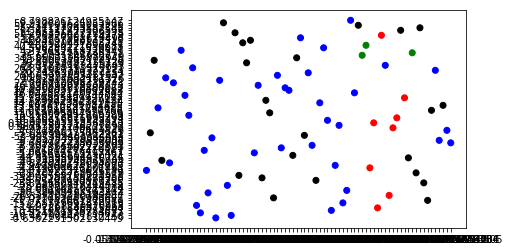

In [246]:
clrArr = np.full(len(matrixnp),"Black")
for l in label[1]:
    clrArr[l] = 'Red'
for l in label[2]:
    clrArr[l] = 'Blue'
for l in label[3]:
    clrArr[l] = 'Green'

plt.scatter(matrixnp[:,0],matrixnp[:,1], c=clrArr) 
plt.show()